# 1. 데이터 전처리

## 불러올 라이브러리 및 필요 데이터

In [ ]:
import pandas as pd
import numpy as np
import requests
import re
from bs4 import BeautifulSoup

In [ ]:
championNames = {
    "1": "애니",
    "2": "올라프",
    "3": "갈리오",
    "4": "트위스티드 페이트",
    "5": "신 짜오",
    "6": "우르곳",
    "7": "르블랑",
    "8": "블라디미르",
    "9": "피들스틱",
    "10": "케일",
    "11": "마스터 이",
    "12": "알리스타",
    "13": "라이즈",
    "14": "시온",
    "15": "시비르",
    "16": "소라카",
    "17": "티모",
    "18": "트리스타나",
    "19": "워윅",
    "20": "누누와 윌럼프",
    "21": "미스 포츈",
    "22": "애쉬",
    "23": "트린다미어",
    "24": "잭스",
    "25": "모르가나",
    "26": "질리언",
    "27": "신지드",
    "28": "이블린",
    "29": "트위치",
    "30": "카서스",
    "31": "초가스",
    "32": "아무무",
    "33": "람머스",
    "34": "애니비아",
    "35": "샤코",
    "36": "문도 박사",
    "37": "소나",
    "38": "카사딘",
    "39": "이렐리아",
    "40": "잔나",
    "41": "갱플랭크",
    "42": "코르키",
    "43": "카르마",
    "44": "타릭",
    "45": "베이가",
    "48": "트런들",
    "50": "스웨인",
    "51": "케이틀린",
    "53": "블리츠크랭크",
    "54": "말파이트",
    "55": "카타리나",
    "56": "녹턴",
    "57": "마오카이",
    "58": "레넥톤",
    "59": "자르반 4세",
    "60": "엘리스",
    "61": "오리아나",
    "62": "오공",
    "63": "브랜드",
    "64": "리 신",
    "67": "베인",
    "68": "럼블",
    "69": "카시오페아",
    "72": "스카너",
    "74": "하이머딩거",
    "75": "나서스",
    "76": "니달리",
    "77": "우디르",
    "78": "뽀삐",
    "79": "그라가스",
    "80": "판테온",
    "81": "이즈리얼",
    "82": "모데카이저",
    "83": "요릭",
    "84": "아칼리",
    "85": "케넨",
    "86": "가렌",
    "89": "레오나",
    "90": "말자하",
    "91": "탈론",
    "92": "리븐",
    "96": "코그모",
    "98": "쉔",
    "99": "럭스",
    "101": "제라스",
    "102": "쉬바나",
    "103": "아리",
    "104": "그레이브즈",
    "105": "피즈",
    "106": "볼리베어",
    "107": "렝가",
    "110": "바루스",
    "111": "노틸러스",
    "112": "빅토르",
    "113": "세주아니",
    "114": "피오라",
    "115": "직스",
    "117": "룰루",
    "119": "드레이븐",
    "120": "헤카림",
    "121": "카직스",
    "122": "다리우스",
    "126": "제이스",
    "127": "리산드라",
    "131": "다이애나",
    "133": "퀸",
    "134": "신드라",
    "136": "아우렐리온 솔",
    "141": "케인",
    "142": "조이",
    "143": "자이라",
    "145": "카이사",
    "147": "세라핀",
    "150": "나르",
    "154": "자크",
    "157": "야스오",
    "161": "벨코즈",
    "163": "탈리야",
    "164": "카밀",
    "166": "아크샨",
    "200": "벨베스",
    "201": "브라움",
    "202": "진",
    "203": "킨드레드",
    "221": "제리",
    "222": "징크스",
    "223": "탐 켄치",
    "234": "비에고",
    "235": "세나",
    "236": "루시안",
    "238": "제드",
    "240": "클레드",
    "245": "에코",
    "246": "키아나",
    "254": "바이",
    "266": "아트록스",
    "267": "나미",
    "268": "아지르",
    "350": "유미",
    "360": "사미라",
    "412": "쓰레쉬",
    "420": "일라오이",
    "421": "렉사이",
    "427": "아이번",
    "429": "칼리스타",
    "432": "바드",
    "497": "라칸",
    "498": "자야",
    "516": "오른",
    "517": "사일러스",
    "518": "니코",
    "523": "아펠리오스",
    "526": "렐",
    "555": "파이크",
    "711": "벡스",
    "777": "욘",
    "875": "세트",
    "876": "릴리아",
    "887": "그웬",
    "888": "레나타 글라스크",
    "895": "닐라",
    "897": "크산테"
}

## 크롤링 라이브러리 불러오기

In [ ]:
!pip install html_table_parser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 4.5 MB/s 
  Created wheel for html-table-parser: filename=html_table_parser-0.1.0-py3-none-any.whl size=4644 sha256=c6fa9926e37b2f93114a0a096fc937bbaa2b6d48be7f98906b10197a70a5a2dc
  Stored in directory: /root/.cache/pip/wheels/b8/a6/f0/e77452c538f4ab23004d6d23be1a38e39cfd45ab8a80f6709d
Successfully built html-table-parser
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
#### 크롤링 모듈
import requests
import re
from bs4 import BeautifulSoup
from html_table_parser import parser_functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data 크롤링 및 가공

1. 챔피언 이름 및 해당 챔피언의 라인에서의 파워
2. 챔피언의 라인별 상대전적 승률
3. 크롤링 된 소환사 데이터 승률 가공 후 출력

In [ ]:
from pandas.core.arrays.interval import NA

re_ = {
  "Jhin": "진",
	"Shen": "쉔",
	"Rell": "렐",
	"Quinn": "퀸"
}
########################################################################
#### 챔피언 정보 링크 불러오고 함수 호출해서 상대전적 계산 from fow.kr

def ex_champ_link(url):
  champs = []
  pos = []
  res = []
  result = requests.get(url)
  soup = BeautifulSoup(result.text, "html.parser")

  champ_link = soup.find_all("td", {"class":"td_champ"})
  champ_li = soup.find_all("a", {"class":"champ_link"})
  champ_pos = soup.find_all("td", {"class":"td_pos"})

  for p in champ_pos:
    pos_data = p.find("a")
    if pos_data == None or type(pos_data) == int: continue
    pos.append(pos_data.getText().replace("\n", "").replace(" ", ""))

  for c in champ_link:
    champ_name = c.find("span").getText()
    if champ_name in re_.keys():
      champs.append(re_[champ_name])
    else :
      champs.append(champ_name)

  for i in range(len(champs)):
    res.append((champs[i]+"/"+pos[i]))

  champ_name = list(championNames.values())

  # 불러온 챔피언으로 데이터 프레임 행 및 열 집어넣기
  idx = 0 # res에서 라인을 불러올 index
  champ_df = pd.DataFrame(index = res, columns = champ_name)

  # for champ, lane in reversed(res):
  #   champ_df.loc[champ, "라인"] = lane

  # for champ, lane in res:
  #     if lane == champ_df.loc[champ, "라인"]:
  #       continue
  #     champ_df.loc[champ, "라인"] = champ_df.loc[champ, "라인"] + "\n" + lane

  idx = 0
  for champ in champ_link:
  # search 시작
    result_temp = requests.get("https://fow.kr/" + champ.find("a", {"class":"champ_link"})["href"])
    soup = BeautifulSoup(result_temp.text, "html.parser")

    winrate_data = soup.find_all("a", {"class":"champ_counter"}) # 해당 챔피언 승률
    counter_data = soup.find_all("div", {"class":"counter_cname"}) # 카운터 챔피언 이름
    champ_name = soup.find("div", {"class":"champ_solo"}).getText() # 지금 챔피언 이름

    champ_name = re.search("\w+\s*\w+", champ_name).group()

    counters = []
    for counter in counter_data:
      counters.append(counter.find("img").getText())
    tmp_list = []
    for data in winrate_data:
      winrate = data.find("span", {"class":"winrate_hard"})
      if (winrate == None):
        tmp_list.append(data.find("span", {"class":"winrate_easy"}).getText())
      else:
        tmp_list.append(winrate.getText())

    for i in reversed(range(len(counters))):
        champ_df.loc[res[idx].strip(), counters[i]] = tmp_list[i]
    idx += 1

    # for i in champ_df.columns:
    #   if i == "라인": continue
    #   champ_df.iloc[res[idx], i] = champ_df.iloc[res[idx], i] + "\n"

    # for i in range(len(counters)):
    #   if tmp_list[i] == champ_df.loc[res[idx], counters[i]]:
    #     continue
    #   champ_df.loc[res[idx], counters[i]] = champ_df.loc[res[idx], counters[i]] + "\n" + tmp_list[i]



  champ_df.rename({"Unnamed: 0" : "챔피언"}, inplace=True)
  return champ_df


In [ ]:
#######################################################################
#### 챔피언, 라인에 맞게 해당 table을 저장하는 것
def extract_champ_data(url, champ, line):
  result = requests.get(url)
  soup = BeautifulSoup(result.text, "html.parser")

  data = soup.select_one("div.basic_info > table")
  table = parser_functions.make2d(data)

  df = pd.DataFrame(data=table[1:], columns=table[0])
  print(df.loc[:,"평균"][0])
  return df
########################################################################
#### 챔피언 승률 및 메타 데이터 불러오는 함수
def ex_champ_meta(url):
  champs = []
  pos = []
  result = requests.get(url)
  soup = BeautifulSoup(result.text, "html.parser")

  champ_link = soup.find_all("td", {"class":"td_champ"})
  champ_li = soup.find_all("a", {"class":"champ_link"})
  champ_pos = soup.find_all("td", {"class":"td_pos"})

  # 챔피언 불러오기
  champs.append("라인")
  for champ in champ_li:
    champ_name = champ.find("span").getText()
    champs.append(champ_name)

  for p in champ_pos:
    pos_data = p.find("a")
    if pos_data == None or type(pos_data) == int: continue
    pos.append(pos_data.getText().replace("\n", ""))
  # 불러온 챔피언으로 데이터 프레임 행 및 열 집어넣기
  champ_df = pd.DataFrame(index = champs[1:], columns=champs)
  print(champ_df.shape)

  champ_df["라인"] = pos


  i = 0
  print("시작")
  # 각 챔피언 확인
  for champ in champ_link:
    link = champ.find("a", {"class":"champ_link"})["href"]
    extract_champ_data("https://fow.kr/" + link, link.split("/")[2], link.split("/")[3])
    break


In [ ]:
data_df = ex_champ_link("http://fow.kr/stats")
data_df.to_csv("data1.csv", encoding="utf-8-sig")

In [ ]:
ex_champ_meta("http://fow.kr/stats")

(309, 310)
시작
        분류      평균     원딜 순위      전체 순위
0       승률  50.44%   13 / 31  140 / 352
1     경기밴율  10.69%  27 / 141   27 / 141
2     전체밴율  11.01%  27 / 141   27 / 141
3       픽률  31.51%    1 / 31    1 / 352
4      KDA    2.52    5 / 31   83 / 352
5        킬    8.14    2 / 31   17 / 352
6       죽음    5.59   11 / 31  164 / 352
7     어시스트    5.94   26 / 31  233 / 352
8     골드획득  12,332    4 / 31   34 / 352
9     챔프딜량  19,747   15 / 31  119 / 352
10  입은 피해량  18,781   17 / 31   78 / 352
11      CS   185.6    4 / 31   22 / 352
12   플레이시간   27:01   22 / 31  237 / 352
50.44%


## 크롤링한 데이터 전처리

In [ ]:
# #####zip 압축해제
# %cd /content/drive/MyDrive/project_ml/usr_data_3/
# !unzip -qq "newys (1).zip"

/content/drive/MyDrive/project_ml/usr_data_3


In [ ]:
#### 원래 버전
import os
import re
import pandas as pd

path = "/content/drive/MyDrive/project_ml/usr_data_2/"
csv_list = os.listdir(path)

for csv in csv_list:
  tmp = []
  idx = 0

  df = pd.read_csv(path+csv)
  if (len(df['win_percent']) == 0): continue

  win_data = df["win_percent"]
  df.drop("win_percent", axis=1, inplace=True)
  df.drop("Unnamed: 0", axis=1, inplace=True)

  total = []
  victory = []
  defeat = []
  rate = []
  for w in win_data:
    w_list = w.split("\n")

    if (len(w_list) == 3):
      v = int(re.search("\d+", w_list[0]).group())
      d = int(re.search("\d+", w_list[1]).group())
      t = int(v) + int(d)
      total.append(t)
      victory.append(v)
      defeat.append(d)
      rate.append(int(re.search("\d+", w_list[2]).group()))
    else:
      t = int(re.search("\d+", w_list[0]).group())
      total.append(t)
      if (w_list[1] == "0%"):
        victory.append(0)
        defeat.append(int(re.search("\d+", w_list[0]).group()))
        rate.append(int(re.search("\d+", w_list[1]).group()))
      else:
        victory.append(int(re.search("\d+", w_list[0]).group()))
        defeat.append(0)
        rate.append(int(re.search("\d+", w_list[1]).group()))

  df["total"] = total
  df["victory"] = victory
  df["defeat"] = defeat
  df["win_rate"] = rate

  df.to_csv(f"/content/drive/MyDrive/project_ml/usr_data_2/processed_usr_data/{csv}", encoding="utf-8-sig")

print("finish {} files".format(len(os.listdir("/content/drive/MyDrive/project_ml/usr_data_2/processed_usr_data/"))))

In [ ]:
# victory 오타 수정
file_list = os.listdir("/content/drive/MyDrive/project_ml/processed_usr_data/")
path = "/content/drive/MyDrive/project_ml/usr_data/"

for f in file_list:
  csv_df = pd.read_csv(path+f)

In [ ]:
origin = len(os.listdir("/content/drive/MyDrive/project_ml/usr_data/"))
processed = len(os.listdir("/content/drive/MyDrive/project_ml/processed_usr_data/"))

print(origin - processed)

265


In [ ]:
import os
import re
import pandas as pd

path = "/content/drive/MyDrive/project_ml/usr_data_3/"
csv_list = os.listdir(path)

for csv in csv_list:
  tmp = []
  idx = 0
  print(csv)
  if csv == "processed_usr_data": continue
  df = pd.read_csv(path+csv)

  if (len(df['win_percent']) == 0): continue

  win_data = df["win_percent"]
  df.drop("win_percent", axis=1, inplace=True)
  df.drop("Unnamed: 0", axis=1, inplace=True)

  total = []
  victory = []
  defeat = []
  rate = []
  for w in win_data:
    w_list = re.findall("\d+", w)

    if (len(w_list) == 3):
      v = int(w_list[0])
      d = int(w_list[1])
      t = int(v) + int(d)
      total.append(t)
      victory.append(v)
      defeat.append(d)
      rate.append(int(w_list[2]))
    else:
      t = int(w_list[0])
      total.append(t)
      if (w_list[1] == "0%"):
        victory.append(0)
        defeat.append(int(w_list[0]))
        rate.append(int(w_list[1]))
      else:
        victory.append(int(w_list[0]))
        defeat.append(0)
        rate.append(int(w_list[1]))

  df["total"] = total
  df["victory"] = victory
  df["defeat"] = defeat
  df["win_rate"] = rate

  df.to_csv(f"/content/drive/MyDrive/project_ml/usr_data_3/processed_usr_data/{csv}", encoding="utf-8-sig")

print("finish {} files".format(len(os.listdir("/content/drive/MyDrive/project_ml/usr_data_3/processed_usr_data/"))))

In [ ]:
origin = len(os.listdir("/content/drive/MyDrive/project_ml/usr_data_3/"))
processed = len(os.listdir("/content/drive/MyDrive/project_ml/usr_data_3/processed_usr_data/"))

print(origin - processed)

561


## 챔피언 상대전적 데이터 불러오기

In [ ]:
Lane_label = {
    "TOP":"탑",
    "JUNGLE":"정글",
    "MIDDLE":"미드",
    "BOTTOM":"원딜",
    "SUPPORT":"서폿"
}

def compare_by_champ(champ1, lane, champ2):
  df = pd.read_csv("/content/drive/MyDrive/relative_record.csv", index_col = 0) # 상대전적 데이터 불러오기
  if lane in Lane_label:
    lane = Lane_label[lane]
  try:
    found = df.loc[championNames[str(champ1)] + "/" + lane, championNames[str(champ2)]]
  except:
    return 50.0
  if str(found) == "nan":
    return 50.0
  return float(found.replace("%", ""))

### 호출 방식 ( AllyChampionID, Lane, EnemyChanpionID )
print(compare_by_champ(240, "정글", 2))

50.0


# 2. 모델 구축

## 승/패 이진 분류 모델 생성

In [ ]:
#### 모델링 라이브러리 구축
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score # 정확도 함수

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 정규화
df_match = pd.read_csv("/content/drive/MyDrive/project_ml/train_data(median).csv", index_col = 0)
scaler = MinMaxScaler()
win = df_match.loc[:, "win"]
df_match[:] = scaler.fit_transform(df_match[:])
df_match["win"] = win
print(df_match.shape)

(1633, 126)


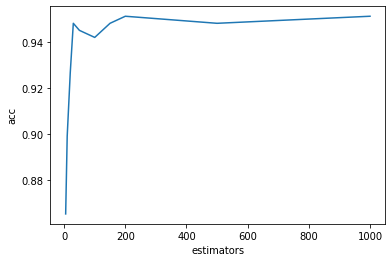

[0.8654434250764526, 0.8990825688073395, 0.926605504587156, 0.9480122324159022, 0.944954128440367, 0.9418960244648318, 0.9480122324159022, 0.9510703363914373, 0.9480122324159022, 0.9510703363914373]


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

X = df_match.iloc[:, :115]
y = df_match.loc[:, "win"]

estimators = [5, 10, 20, 30, 50, 100, 150, 200, 500, 1000]
rand_acc = []

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 5)

for n in estimators:
  clf = RandomForestClassifier(n_estimators=n, max_depth=5,random_state=0)
  clf.fit(train_x, train_y)
  predict1 = clf.predict(test_x)
  rand_acc.append(accuracy_score(test_y,predict1))


plt.xlabel("estimators")
plt.ylabel("acc")

plt.plot(estimators, rand_acc)
plt.show()
print(rand_acc)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = df_match.iloc[:, :115]
y = df_match.loc[:, "win"]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 10)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_x, train_y)

predict2 = clf.predict(test_x)
print(accuracy_score(test_y, predict2))

0.9938837920489296


In [ ]:
# Soft Vector Machine
import sklearn.svm as svm
from sklearn.model_selection import cross_val_score, cross_validate

X = df_match.iloc[:, :115]
y = df_match.loc[:, "win"]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 15)

# linear
svm_clf = svm.SVC(kernel = 'linear')
scores = cross_val_score(svm_clf, X, y, cv = 5)
print('교차검증 평균: ', scores.mean())

# rbf
svm_clf_rbf = svm.SVC(kernel = 'rbf')
scores_1 = cross_val_score(svm_clf_rbf, X, y, cv = 5)
print('교차검증 평균: ', scores_1.mean())

교차검증 평균:  0.9773456407947319
교차검증 평균:  0.9767321438622165


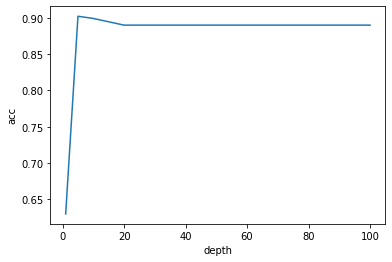

[0.6299694189602446, 0.9021406727828746, 0.8990825688073395, 0.8899082568807339, 0.8899082568807339, 0.8899082568807339]


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

X = df_match.iloc[:, :115]
y = df_match.loc[:, "win"]
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 5)

depth = [1, 5, 10, 20, 50, 100]
dec_acc = []

for d in depth:
  tree = DecisionTreeClassifier(max_depth = d, random_state=0)
  tree.fit(train_x, train_y)
  predict3 = tree.predict(test_x)
  dec_acc.append(accuracy_score(test_y, predict3))


plt.xlabel("depth")
plt.ylabel("acc")

plt.plot(depth, dec_acc)
plt.show()
print(dec_acc)

In [ ]:
# Naive baise
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
model.fit(train_x, train_y)
predict4 = model.predict(test_x)
print(accuracy_score(predict4, test_y))

0.8226299694189603
